In [44]:
#standard for DS
import pandas as pd
import numpy as np

#viz and stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# helpers
import wrangle
import explore

# Shhhh
import warnings
warnings.filterwarnings("ignore")

-----

##### Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:


In [45]:
df = wrangle.get_zillow_data()

In [46]:
df = df[df.bedroomcnt != 0]

In [47]:
df = df[df.bathroomcnt != 0]

> I'm sorry, but if you have no bedrooms or no bathrooms, you aren't a single family residence, you're like a hunting cabin or hostel room.

In [48]:
df.bedroomcnt.unique(), df.bathroomcnt.unique()

(array([ 4.,  2.,  3.,  6.,  5.,  1.,  7.,  8., 12., 10.,  9., 14., 11.,
        16., 13.]),
 array([ 3.5,  1. ,  2. ,  3. ,  2.5,  4.5,  4. ,  5. ,  6.5,  1.5,  6. ,
         5.5,  7. ,  9. ,  8. , 10. , 11. , 18. ,  7.5, 13. ,  8.5]))

In [49]:
df.propertylandusedesc.unique()

array(['Single Family Residential', 'Condominium',
       'Duplex (2 Units, Any Combination)', 'Planned Unit Development',
       'Triplex (3 Units, Any Combination)',
       'Quadruplex (4 Units, Any Combination)', 'Cluster Home',
       'Cooperative', 'Residential General',
       'Manufactured, Modular, Prefabricated Homes', 'Mobile Home',
       'Townhouse'], dtype=object)

In [50]:
df = df[df.propertylandusedesc != "Duplex (2 Units, Any Combination)"]

In [51]:
df = df[df.propertylandusedesc != "Planned Unit Development"]

In [52]:
df = df[df.propertylandusedesc != "Triplex (3 Units, Any Combination)"]

In [53]:
df = df[df.propertylandusedesc != "Quadruplex (4 Units, Any Combination)"]

In [54]:
# Now Cluster homes are usually individual, and each unit owns themselves and the land they're on, 
# but let's see how this data set does it
df[df.propertylandusedesc == "Cluster Home"]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
816,1387621,17154779,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.111004e+13,-0.006820,2017-01-05,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN
1112,2848582,17118180,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.111003e+13,-0.022208,2017-01-05,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN
1825,2684884,17213665,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,6.111007e+13,-0.007017,2017-01-10,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN
1984,1581819,17187156,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,6.111005e+13,-0.011310,2017-01-10,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN
2173,1029476,17139329,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,...,6.111005e+13,0.109234,2017-01-11,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75291,2714709,17206752,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,6.111008e+13,-0.032681,2017-09-11,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN
75328,552725,17219182,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,...,6.111008e+13,0.040158,2017-09-11,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN
75713,2744188,17135378,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.111006e+13,0.021763,2017-09-12,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN
75936,149447,17073778,NaN,NaN,NaN,2.5,3.0,NaN,NaN,2.5,...,6.111002e+13,0.027067,2017-09-13,NaN,NaN,NaN,NaN,Cluster Home,NaN,NaN


In [55]:
# Cluster Homes still act like Single Family, so we'll skip removing them.
# Onward!
df.propertylandusedesc.unique()

array(['Single Family Residential', 'Condominium', 'Cluster Home',
       'Cooperative', 'Residential General',
       'Manufactured, Modular, Prefabricated Homes', 'Mobile Home',
       'Townhouse'], dtype=object)

In [56]:
df[df.propertylandusedesc == "Cooperative"]
df[df.propertylandusedesc == "Residential General"]
df.bedroomcnt[df.propertylandusedesc == "Manufactured, Modular, Prefabricated Homes"].unique()
df[df.propertylandusedesc == "Townhouse"]

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
23703,1834469,10841004,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037128e+13,-0.039344,2017-04-05,Central,NaN,NaN,Central,Townhouse,NaN,NaN
24804,88893,10840997,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037128e+13,-0.129124,2017-04-10,Central,NaN,NaN,Central,Townhouse,NaN,NaN
30629,402392,12013206,1.0,NaN,NaN,2.0,2.0,NaN,7.0,2.0,...,6.037190e+13,0.022429,2017-04-28,Central,NaN,NaN,Central,Townhouse,NaN,NaN
39066,1664944,12835610,1.0,NaN,NaN,3.0,3.0,NaN,6.0,3.0,...,6.037408e+13,0.079530,2017-05-24,Central,NaN,NaN,Central,Townhouse,NaN,NaN
44713,1147937,12013219,1.0,NaN,NaN,2.0,2.0,NaN,7.0,2.0,...,6.037190e+13,0.016643,2017-06-09,Central,NaN,NaN,Central,Townhouse,NaN,NaN
60430,1729882,12069518,1.0,NaN,NaN,3.0,3.0,NaN,9.0,3.0,...,6.037302e+13,-0.042704,2017-07-26,Central,NaN,NaN,Central,Townhouse,NaN,NaN


> Okay the rest look good.

In [57]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


> Don't need secondary keys.

In [58]:
df = df.drop(columns=["airconditioningtypeid", "architecturalstyletypeid", "buildingclasstypeid", "heatingorsystemtypeid", "propertylandusetypeid", "storytypeid", "typeconstructiontypeid"])

In [59]:
df.basementsqft = df.basementsqft.fillna(0)

In [60]:
df = df.drop(columns=["finishedsquarefeet12", "finishedsquarefeet13", "finishedsquarefeet15", "finishedsquarefeet50", "finishedsquarefeet6"])

In [61]:
df = df.drop(columns=["calculatedbathnbr", "finishedfloor1squarefeet", "fullbathcnt", "taxdelinquencyyear", "censustractandblock"])

In [62]:
df.fireplacecnt = df.fireplacecnt.fillna(0)

In [63]:
df.garagecarcnt = df.garagecarcnt.fillna(0)

In [64]:
df.garagetotalsqft = df.garagetotalsqft.fillna(0)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71648 entries, 0 to 77379
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71648 non-null  int64  
 1   parcelid                      71648 non-null  int64  
 2   basementsqft                  71648 non-null  float64
 3   bathroomcnt                   71648 non-null  float64
 4   bedroomcnt                    71648 non-null  float64
 5   buildingqualitytypeid         44798 non-null  float64
 6   decktypeid                    612 non-null    float64
 7   calculatedfinishedsquarefeet  71638 non-null  float64
 8   fips                          71648 non-null  float64
 9   fireplacecnt                  71648 non-null  float64
 10  garagecarcnt                  71648 non-null  float64
 11  garagetotalsqft               71648 non-null  float64
 12  hashottuborspa                1537 non-null   float64
 13  l

---
Totally didn't spend forever cleaning it, and it's only halfway clean.

------


1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?


- Is logerror significantly different for houses with pools vs without?
- Is logerror significantly different for houses with bathrooms above the median bathroom count vs. below it?
- Is logerror significantly different for houses with garages vs without?
- Is there a difference in logerror for houses with above the mean property size, vs below it?
- Does a fireplace play a role in the logerror vs not having one?


2. Answer those questions through a mix of statistical tests and visualizations.


- Is logerror significantly different for houses with pools vs without?


In [66]:
df.poolcnt.unique()

array([nan,  1.])

In [67]:
df.poolcnt = df.poolcnt.fillna(0)

In [68]:
df.poolcnt = df.poolcnt.astype(int)

> More Cleaning. 0 = No pool 1 = Pool (since there isn't really any houses here with more than one.) No more 0.0, 1.0 going better binary

In [69]:
df = wrangle.remove_outliers(df,col_list=["logerror"])

In [70]:
train, validate, test = wrangle.train_split(df)

-----------




-----------

In [71]:
df.logerror[df.poolcnt == 0], df.logerror[df.poolcnt == 1]
print(f'''DF Mean Log Error:
     {df.logerror.mean()}
Mean Log Error Without Pool | Mean Log Error with Pool
     {df.logerror[df.poolcnt == 0].mean()}    |     {df.logerror[df.poolcnt == 1].mean()}
''')

DF Mean Log Error:
     0.005773061331707612
Mean Log Error Without Pool | Mean Log Error with Pool
     0.00627264441960283    |     0.003989434197381236



> Just looking at this you can see the Mean Log Error is actually a bit lower with a Pool, where as Without a pool is slightly higher than the total mean Log Error.

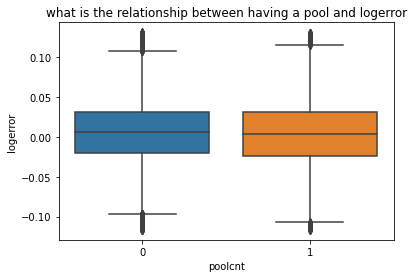

In [72]:
sns.boxplot(train.poolcnt, train.logerror)
plt.title('what is the relationship between having a pool and logerror')
plt.show()

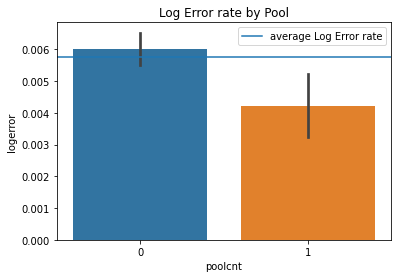

In [73]:
sns.barplot(data=train, x="poolcnt", y="logerror")
rate = df["logerror"].mean()
plt.axhline(rate, label= 'average Log Error rate')
plt.legend()
plt.title('Log Error rate by Pool')
plt.show()

-----

-------

- Is logerror significantly different for houses with bathrooms above the median bathroom count vs. below it?


In [78]:
print(f'''DF Mean Log Error:
     {df.logerror.mean()}
Mean Log Error by Bathroom Count
     {df.logerror[df.bathroomcnt == 1].mean()}
     {df.logerror[df.bathroomcnt == 1.5].mean()}
     {df.logerror[df.bathroomcnt == 2].mean()}
     {df.logerror[df.bathroomcnt == 2.5].mean()}
     {df.logerror[df.bathroomcnt == 3].mean()}
     {df.logerror[df.bathroomcnt == 3.5].mean()}
     {df.logerror[df.bathroomcnt == 4].mean()}
     {df.logerror[df.bathroomcnt == 4.5].mean()}
     {df.logerror[df.bathroomcnt == 5].mean()}
     {df.logerror[df.bathroomcnt == 5.5].mean()}
     {df.logerror[df.bathroomcnt == 6].mean()}
     {df.logerror[df.bathroomcnt == 6.5].mean()}
     {df.logerror[df.bathroomcnt == 7].mean()}
     {df.logerror[df.bathroomcnt == 7.5].mean()}
     {df.logerror[df.bathroomcnt == 8].mean()}
     {df.logerror[df.bathroomcnt == 8.5].mean()}
     {df.logerror[df.bathroomcnt == 9].mean()}
     {df.logerror[df.bathroomcnt == 10].mean()}
     {df.logerror[df.bathroomcnt == 13].mean()}
''')

DF Mean Log Error:
     0.005773061331707612
Mean Log Error by Bathroom Count
     0.0019410788051178313
     0.00429636527913072
     0.003641159962205795
     0.007695589125025683
     0.008065745650604934
     0.01411466660211481
     0.01385230555269564
     0.016521358475961277
     0.021627240335274255
     0.02560786750304869
     0.027596787727183048
     0.03630070316686976
     0.029511915893345616
     0.012247997869192843
     0.03872787644402551
     0.0630671722121
     0.05549519690043749
     0.09262867952185
     0.0131380611632999



<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

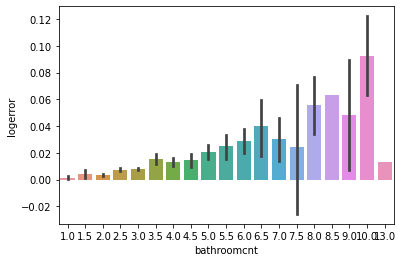

In [75]:
sns.barplot(data=train, x="bathroomcnt", y="logerror")

- Is logerror significantly different for houses with garages vs without?


- Is there a difference in logerror for houses with above the mean property size, vs below it?


- Does a fireplace play a role in the logerror vs not having one?


**Bonus:**

-Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [77]:
df.regionidzip.nunique()

385